In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta
import warnings

warnings.simplefilter("ignore")
%matplotlib inline

# Data Preparation

## Raw Data

In [2]:
symbol = 'GC=F'
start  = '2011-01-03'
end    = '2020-12-31'

In [3]:
asset = yf.download(symbol, start, end) 
asset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1415.599976,1423.900024,1413.699951,1422.599976,1422.599976,28
2011-01-04,1409.599976,1410.900024,1375.800049,1378.500000,1378.500000,122
2011-01-05,1383.400024,1384.000000,1364.199951,1373.400024,1373.400024,175
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024,1371.400024,158
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000,1368.500000,225
...,...,...,...,...,...,...
2020-12-22,1882.199951,1882.199951,1861.000000,1866.599976,1866.599976,233
2020-12-23,1867.000000,1878.800049,1864.500000,1874.699951,1874.699951,82
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,1877.199951,75


In [4]:
df= asset.copy()
df.drop(columns = ['Adj Close','Volume'], inplace = True)
df

,Open,High,Low,Close
Date,,,,
2011-01-03,1415.599976,1423.900024,1413.699951,1422.599976
2011-01-04,1409.599976,1410.900024,1375.800049,1378.500000
2011-01-05,1383.400024,1384.000000,1364.199951,1373.400024
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000
...,...,...,...,...
2020-12-22,1882.199951,1882.199951,1861.000000,1866.599976
2020-12-23,1867.000000,1878.800049,1864.500000,1874.699951
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951


# Inspect raw data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2493 entries, 2011-01-03 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2493 non-null   float64
 1   High    2493 non-null   float64
 2   Low     2493 non-null   float64
 3   Close   2493 non-null   float64
dtypes: float64(4)
memory usage: 97.4 KB


In [6]:
df.describe()

,Open,High,Low,Close
count,2493.000000,2493.000000,2493.000000,2493.000000
mean,1401.623586,1408.802688,1393.886684,1401.401364
std,216.344932,218.401671,213.913149,216.282748
min,1053.699951,1062.000000,1046.199951,1050.800049
25%,1242.099976,1247.800049,1237.400024,1243.400024
50%,1317.199951,1322.699951,1312.400024,1317.400024
75%,1574.900024,1582.699951,1566.000000,1574.599976
max,2045.500000,2063.000000,2040.000000,2051.500000


# Data Preparation

In [7]:
df

,Open,High,Low,Close
Date,,,,
2011-01-03,1415.599976,1423.900024,1413.699951,1422.599976
2011-01-04,1409.599976,1410.900024,1375.800049,1378.500000
2011-01-05,1383.400024,1384.000000,1364.199951,1373.400024
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000
...,...,...,...,...
2020-12-22,1882.199951,1882.199951,1861.000000,1866.599976
2020-12-23,1867.000000,1878.800049,1864.500000,1874.699951
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951


In [8]:
df['Rets'] = np.log(df['Close']/df['Close'].shift(1))
df.dropna(inplace=True)
df

,Open,High,Low,Close,Rets
Date,,,,,
2011-01-04,1409.599976,1410.900024,1375.800049,1378.500000,-0.031490
2011-01-05,1383.400024,1384.000000,1364.199951,1373.400024,-0.003707
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024,-0.001457
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000,-0.002117
2011-01-10,1369.000000,1374.000000,1365.699951,1373.699951,0.003793
...,...,...,...,...,...
2020-12-22,1882.199951,1882.199951,1861.000000,1866.599976,-0.006728
2020-12-23,1867.000000,1878.800049,1864.500000,1874.699951,0.004330
2020-12-28,1895.500000,1895.800049,1873.699951,1877.199951,0.001333


In [9]:
df.describe()

,Open,High,Low,Close,Rets
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,1401.617977,1408.796630,1393.878733,1401.392857,0.000114
std,216.388172,218.445296,213.955713,216.325739,0.010375
min,1053.699951,1062.000000,1046.199951,1050.800049,-0.098206
25%,1242.099976,1247.775024,1237.275024,1243.250031,-0.004614
50%,1317.149963,1322.549988,1312.400024,1317.250000,0.000235
75%,1575.100006,1582.899963,1566.000000,1574.624969,0.005407
max,2045.500000,2063.000000,2040.000000,2051.500000,0.057775


In [10]:
price = df['Close']
price

Date
2011-01-04    1378.500000
2011-01-05    1373.400024
2011-01-06    1371.400024
2011-01-07    1368.500000
2011-01-10    1373.699951
                 ...     
2020-12-22    1866.599976
2020-12-23    1874.699951
2020-12-28    1877.199951
2020-12-29    1879.699951
2020-12-30    1891.000000
Name: Close, Length: 2492, dtype: float64

In [11]:
def get_Daily_Volatility(Close,span0=20):
    # simple percentage returns
    df0=Close.pct_change()
    # 20 days, a month EWM's std as boundary
    df0=df0.ewm(span=span0).std()
    df0.dropna(inplace=True)
    return df0

In [12]:
df0 = get_Daily_Volatility(price)
df0

Date
2011-01-06    0.001586
2011-01-07    0.001120
2011-01-10    0.003357
2011-01-11    0.004805
2011-01-12    0.004184
                ...   
2020-12-22    0.010670
2020-12-23    0.010213
2020-12-28    0.009715
2020-12-29    0.009242
2020-12-30    0.008920
Name: Close, Length: 2490, dtype: float64

In [13]:
def get_atr(df, win=10):
    
    atr_df = pd.Series(index=df.index)
    High   = pd.Series(df.High.rolling(win, min_periods=win))
    Low    = pd.Series(df.Low.rolling(win, min_periods=win))
    Close  = pd.Series(df.Close.rolling(win, min_periods=win))    
          
    for i in range(len(df.index)):
        tr=np.max([(High[i] - Low[i]), np.abs(High[i] - Close[i]), np.abs(Low[i] - Close[i])], axis=0)
        atr_df[i] = tr.sum() / win
     
    return  atr_df

In [14]:
get_atr(df, 10)

Date
2011-01-04     3.509998
2011-01-05     5.490002
2011-01-06     6.250000
2011-01-07     8.419995
2011-01-10     9.250000
                ...    
2020-12-22    21.499988
2020-12-23    18.919995
2020-12-28    19.020007
2020-12-29    17.490015
2020-12-30    18.040015
Length: 2492, dtype: float64

In [15]:
daily_volatility = get_Daily_Volatility(price)

### Time step of vertical barrior

In [16]:
t_final = 5

In [17]:
#the up and low boundary multipliers
upper_lower_multipliers = [2, 2]

In [18]:
#allign the index
prices = price[daily_volatility.index]

In [19]:
def get_3_barriers():
    #create a container
    barriers = pd.DataFrame(columns=['days_passed','price','vert_barrier','top_barrier','bottom_barrier'],\
                            index = daily_volatility.index)
    
    for day, vol in daily_volatility.iteritems():
        days_passed = len(daily_volatility.loc[daily_volatility.index[0] : day])
        #set the vertical barrier 
        if (days_passed + t_final < len(daily_volatility.index) and t_final != 0):
            vert_barrier = daily_volatility.index[days_passed + t_final]
        else:
            vert_barrier = np.nan
        #set the top barrier
        if upper_lower_multipliers[0] > 0:
            top_barrier = prices.loc[day] + prices.loc[day] * upper_lower_multipliers[0] * vol
        else:
            #set it to NaNs
            top_barrier = pd.Series(index=prices.index)
        #set the bottom barrier
        if upper_lower_multipliers[1] > 0:
            bottom_barrier = prices.loc[day] - prices.loc[day] * upper_lower_multipliers[1] * vol
        else: 
            #set it to NaNs
            bottom_barrier = pd.Series(index=prices.index)
            
        barriers.loc[day, ['days_passed', 'price','vert_barrier','top_barrier', 'bottom_barrier']] = \
         days_passed, prices.loc[day], vert_barrier,top_barrier, bottom_barrier
    return barriers

In [20]:
barriers = get_3_barriers()
barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier
Date,,,,,
2011-01-06,1,1371.4,2011-01-14 00:00:00,1375.75,1367.05
2011-01-07,2,1368.5,2011-01-18 00:00:00,1371.56,1365.44
2011-01-10,3,1373.7,2011-01-19 00:00:00,1382.92,1364.48
2011-01-11,4,1384,2011-01-20 00:00:00,1397.3,1370.7
2011-01-12,5,1385.7,2011-01-21 00:00:00,1397.3,1374.1
...,...,...,...,...,...
2020-12-22,2486,1866.6,NaN,1906.43,1826.77
2020-12-23,2487,1874.7,NaN,1912.99,1836.41
2020-12-28,2488,1877.2,NaN,1913.68,1840.72


In [21]:
barriers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2490 entries, 2011-01-06 to 2020-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   days_passed     2490 non-null   object
 1   price           2490 non-null   object
 2   vert_barrier    2484 non-null   object
 3   top_barrier     2490 non-null   object
 4   bottom_barrier  2490 non-null   object
dtypes: object(5)
memory usage: 196.7+ KB


In [22]:
barriers['out'] = None
barriers.head(20)

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out
Date,,,,,,
2011-01-06,1,1371.4,2011-01-14 00:00:00,1375.75,1367.05,None
2011-01-07,2,1368.5,2011-01-18 00:00:00,1371.56,1365.44,None
2011-01-10,3,1373.7,2011-01-19 00:00:00,1382.92,1364.48,None
2011-01-11,4,1384,2011-01-20 00:00:00,1397.3,1370.7,None
2011-01-12,5,1385.7,2011-01-21 00:00:00,1397.3,1374.1,None
2011-01-13,6,1386.9,2011-01-24 00:00:00,1397.22,1376.58,None
2011-01-14,7,1360.4,2011-01-25 00:00:00,1384.65,1336.15,None
2011-01-18,8,1368.1,2011-01-26 00:00:00,1391.85,1344.35,None
2011-01-19,9,1370.2,2011-01-27 00:00:00,1392.15,1348.25,None


## Data Labeling

In [23]:
def get_labels():

    for i in range(len(barriers.index)):
        start = barriers.index[i]
        end = barriers.vert_barrier[i]
        if pd.notna(end):
            # assign the initial and final price
            price_initial = barriers.price[start]
            price_final = barriers.price[end]
            # assign the top and bottom barriers
            top_barrier = barriers.top_barrier[i]
            bottom_barrier = barriers.bottom_barrier[i]
            #set the profit taking and stop loss conditons
            
            
            #condition_pt = (barriers.price[start: end] >= top_barrier).any()
            #condition_sl = (barriers.price[start: end] <= bottom_barrier).any()
            #assign the labels
            condition_pt = (barriers.price[start: end] >= top_barrier).any()
            condition_sl = (barriers.price[start: end] <= bottom_barrier).any()
            if condition_pt: 
                barriers['out'][i] = 1
            elif condition_sl: 
                barriers['out'][i] = -1   
            
            
            else: 
                barriers['out'][i] = max([(price_final - price_initial)/(top_barrier - price_initial), \
                           (price_final - price_initial)/(price_initial - bottom_barrier)], key=abs)
    return barriers
get_labels()
barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out
Date,,,,,,
2011-01-06,1,1371.4,2011-01-14 00:00:00,1375.75,1367.05,1
2011-01-07,2,1368.5,2011-01-18 00:00:00,1371.56,1365.44,1
2011-01-10,3,1373.7,2011-01-19 00:00:00,1382.92,1364.48,1
2011-01-11,4,1384,2011-01-20 00:00:00,1397.3,1370.7,-1
2011-01-12,5,1385.7,2011-01-21 00:00:00,1397.3,1374.1,-1
...,...,...,...,...,...,...
2020-12-22,2486,1866.6,NaN,1906.43,1826.77,None
2020-12-23,2487,1874.7,NaN,1912.99,1836.41,None
2020-12-28,2488,1877.2,NaN,1913.68,1840.72,None


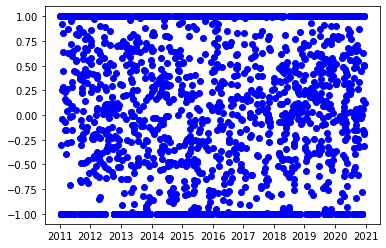

In [24]:
plt.plot(barriers.out,'bo')

In [25]:
#barriers.out.value_counts()

In [26]:
def get_labels():

    for i in range(len(barriers.index)):
        start = barriers.index[i]
        end = barriers.vert_barrier[i]
        if pd.notna(end):
            # assign the initial and final price
            price_initial = barriers.price[start]
            price_final = barriers.price[end]
            # assign the top and bottom barriers
            top_barrier = barriers.top_barrier[i]
            bottom_barrier = barriers.bottom_barrier[i]
            #set the profit taking and stop loss conditons
            
            
            condition_pt = (barriers.price[start: end] >= top_barrier).any()
            condition_sl = (barriers.price[start: end] <= bottom_barrier).any()
            #assign the labels
            #condition_pt = (barriers.price[start: end] > (top_barrier+bottom_barrier)/2).any()
            #condition_sl = (barriers.price[start: end] <= (top_barrier+bottom_barrier)/2).any()
            if condition_pt: 
                barriers['out'][i] = 1
            elif condition_sl: 
                barriers['out'][i] = -1   
                
                
            else: 
                barriers['out'][i] = 0
    return barriers
get_labels()
barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out
Date,,,,,,
2011-01-06,1,1371.4,2011-01-14 00:00:00,1375.75,1367.05,1
2011-01-07,2,1368.5,2011-01-18 00:00:00,1371.56,1365.44,1
2011-01-10,3,1373.7,2011-01-19 00:00:00,1382.92,1364.48,1
2011-01-11,4,1384,2011-01-20 00:00:00,1397.3,1370.7,-1
2011-01-12,5,1385.7,2011-01-21 00:00:00,1397.3,1374.1,-1
...,...,...,...,...,...,...
2020-12-22,2486,1866.6,NaN,1906.43,1826.77,None
2020-12-23,2487,1874.7,NaN,1912.99,1836.41,None
2020-12-28,2488,1877.2,NaN,1913.68,1840.72,None


In [27]:
#barriers.tail(25)

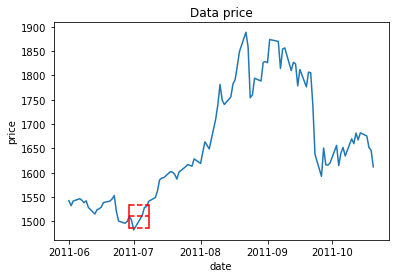

In [28]:
fig,ax = plt.subplots()
ax.set(title='Data price',
       xlabel='date', ylabel='price')
ax.plot(barriers.price[100:200])
start = barriers.index[120]
end = barriers.vert_barrier[120]
upper_barrier = barriers.top_barrier[120]
lower_barrier = barriers.bottom_barrier[120]
ax.plot([start, end], [upper_barrier, upper_barrier], 'r--');
ax.plot([start, end], [lower_barrier, lower_barrier], 'r--');
ax.plot([start, end], [(lower_barrier + upper_barrier)*0.5, \
                       (lower_barrier + upper_barrier)*0.5], 'r--');
ax.plot([start, start], [lower_barrier, upper_barrier], 'r-');
ax.plot([end, end], [lower_barrier, upper_barrier], 'r-');

In [29]:
barriers.out.value_counts()

 0    1078
 1     756
-1     650
Name: out, dtype: int64

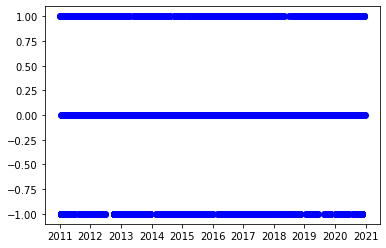

In [30]:
plt.plot(barriers.out,'bo')

In [31]:
df = pd.concat([df,barriers], axis = 1)
df.dropna(inplace = True)
df.drop(columns = ['days_passed','price','vert_barrier','top_barrier','bottom_barrier'], inplace = True)
df.rename(columns = {'out':'Label'}, inplace = True)
df.head(25)

,Open,High,Low,Close,Rets,Label
Date,,,,,,
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024,-0.001457,1
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000,-0.002117,1
2011-01-10,1369.000000,1374.000000,1365.699951,1373.699951,0.003793,1
2011-01-11,1375.400024,1384.500000,1373.900024,1384.000000,0.007470,-1
2011-01-12,1382.599976,1385.500000,1378.000000,1385.699951,0.001228,-1
2011-01-13,1386.099976,1392.500000,1371.400024,1386.900024,0.000866,-1
2011-01-14,1375.000000,1376.000000,1356.699951,1360.400024,-0.019292,-1
2011-01-18,1365.099976,1371.000000,1359.199951,1368.099976,0.005644,-1
2011-01-19,1371.900024,1376.199951,1367.000000,1370.199951,0.001534,-1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2011-01-06 to 2020-12-18
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2484 non-null   float64
 1   High    2484 non-null   float64
 2   Low     2484 non-null   float64
 3   Close   2484 non-null   float64
 4   Rets    2484 non-null   float64
 5   Label   2484 non-null   object 
dtypes: float64(5), object(1)
memory usage: 135.8+ KB


In [33]:
df.describe()

,Open,High,Low,Close,Rets
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,1400.462278,1407.642674,1392.745774,1400.261957,0.000128
std,215.443517,217.508550,213.009012,215.398726,0.010370
min,1053.699951,1062.000000,1046.199951,1050.800049,-0.098206
25%,1241.850006,1247.574982,1236.674957,1242.649963,-0.004614
50%,1316.800049,1322.049988,1312.099976,1316.800049,0.000235
75%,1574.000000,1581.374969,1564.199982,1574.125000,0.005442
max,2045.500000,2063.000000,2040.000000,2051.500000,0.057775


# Feature Preparation  

# Technical Analysis

https://www.fmlabs.com/reference/default.htm?url=StdDevMv.htm

In [34]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

## Momentum Indicators

### Minus Directional Indicator (-DI) and Plus Directional Indicator (+DI)

The +DI is the percentage of the true range that is up. The -DI is the percentage of the true range that is down. A buy signal is generated when the +DI crosses up over the -DI. A sell signal is generated when the -DI crosses up over the +DI. You should wait to enter a trade until the extreme point is reached. That is, you should wait to enter a long trade until the price reaches the high of the bar on which the +DI crossed over the -DI, and wait to enter a short trade until the price reaches the low of the bar on which the -DI crossed over the +DI.

The DI was developed by J. Welles Wilder and is described in his 1978 book New Concepts In Technical Trading Systems.

<img src="Pics/DI.gif">

In [35]:
df['+DI'] = ta.PLUS_DI(df['High'], df['Low'], df['Close'], 10)
df['-DI'] = ta.MINUS_DI(df['High'], df['Low'], df['Close'], 10)
df.head(20)

,Open,High,Low,Close,Rets,Label,+DI,-DI
Date,,,,,,,,
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024,-0.001457,1,NaN,NaN
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000,-0.002117,1,NaN,NaN
2011-01-10,1369.000000,1374.000000,1365.699951,1373.699951,0.003793,1,NaN,NaN
2011-01-11,1375.400024,1384.500000,1373.900024,1384.000000,0.007470,-1,NaN,NaN
2011-01-12,1382.599976,1385.500000,1378.000000,1385.699951,0.001228,-1,NaN,NaN
2011-01-13,1386.099976,1392.500000,1371.400024,1386.900024,0.000866,-1,NaN,NaN
2011-01-14,1375.000000,1376.000000,1356.699951,1360.400024,-0.019292,-1,NaN,NaN
2011-01-18,1365.099976,1371.000000,1359.199951,1368.099976,0.005644,-1,NaN,NaN
2011-01-19,1371.900024,1376.199951,1367.000000,1370.199951,0.001534,-1,NaN,NaN


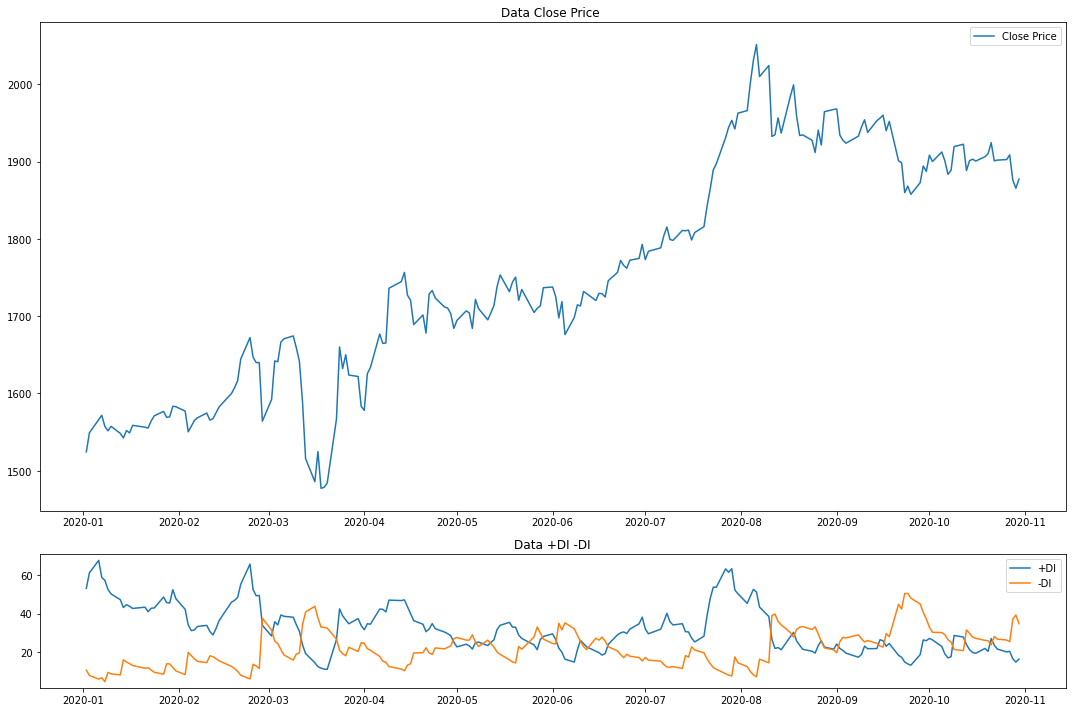

In [36]:
start = '2020-01'
end = '2020-10'

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df[start:end].index,df['Close'][start:end], label='Close Price')
plt.title('Data Close Price ')
plt.legend()

buttom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
buttom.plot(df[start:end].index,df[['+DI','-DI']][start:end])
plt.title('Data +DI -DI' )
plt.legend(['+DI','-DI'])
plt.tight_layout()

## Directional Movement Index (DX)

The DX is usually smoothed with a moving average (i.e. the ADX). The values range from 0 to 100, but rarely get above 60. To interpret the DX, consider a high number to be a strong trend, and a low number, a weak trend.


<img src="Pics/DX.gif">

real = DX(high, low, close, timeperiod=14)

In [37]:
df['DX'] = ta.DX(df['High'], df['Low'], df['Close'], 10)
df

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX
Date,,,,,,,,,
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024,-0.001457,1,NaN,NaN,NaN
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000,-0.002117,1,NaN,NaN,NaN
2011-01-10,1369.000000,1374.000000,1365.699951,1373.699951,0.003793,1,NaN,NaN,NaN
2011-01-11,1375.400024,1384.500000,1373.900024,1384.000000,0.007470,-1,NaN,NaN,NaN
2011-01-12,1382.599976,1385.500000,1378.000000,1385.699951,0.001228,-1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-14,1835.500000,1835.699951,1822.699951,1828.699951,-0.006052,1,21.196692,33.876191,23.023125
2020-12-15,1833.500000,1853.599976,1833.199951,1852.300049,0.012823,0,26.238115,30.507061,7.523011
2020-12-16,1856.500000,1864.699951,1850.500000,1856.099976,0.002049,0,29.316717,28.698524,1.065570


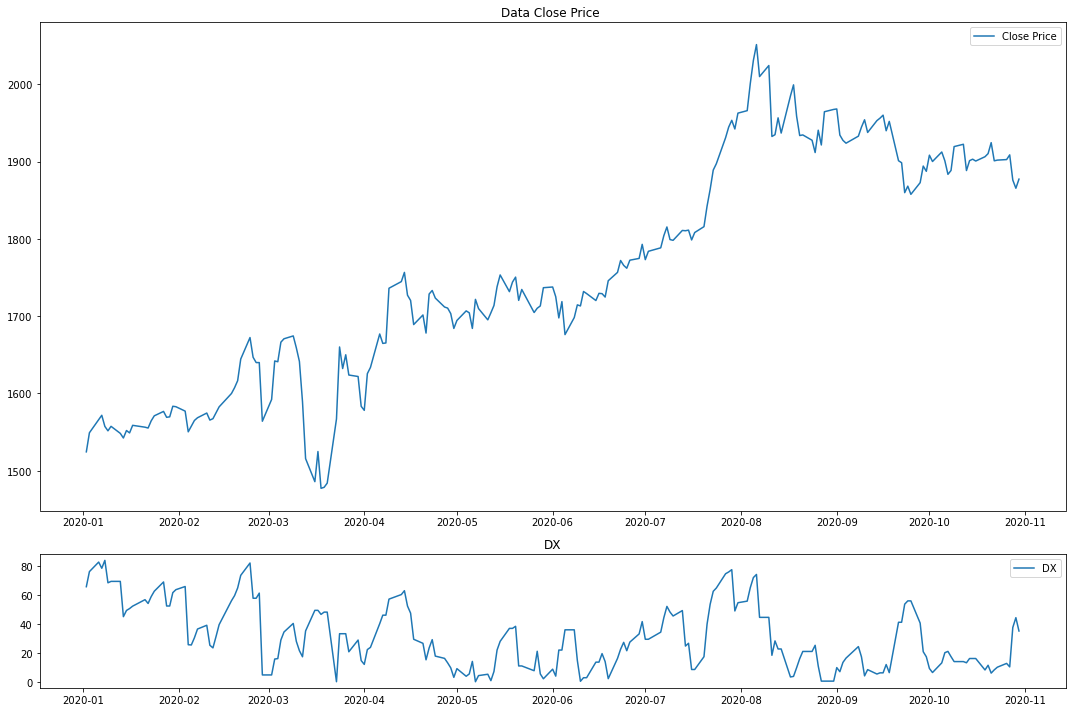

In [38]:
start = '2020-01'
end = '2020-10'

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df[start:end].index,df['Close'][start:end], label='Close Price')
plt.title('Data Close Price ')
plt.legend()

buttom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
buttom.plot(df[start:end].index,df[['DX']][start:end])
plt.title('DX' )
plt.legend(['DX'])
plt.tight_layout()

### ADX - Average Directional Movement Index

The ADX is a Welles Wilder style moving average of the Directional Movement Index (DX). The values range from 0 to 100, but rarely get above 60. To interpret the ADX, consider a high number to be a strong trend, and a low number, a weak trend.

See also +/-DI, DX and ADXR.

The ADX was developed by J. Welles Wilder and is described in his 1978 book New Concepts In Technical Trading Systems.

<img src="Pics/ADX.gif">

real = ADX(high, low, close, timeperiod=14)

In [39]:
df['ADX'] = ta.ADX(df['High'], df['Low'], df['Close'], 10)
df.head(25)

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX,ADX
Date,,,,,,,,,,
2011-01-06,1374.800049,1376.500000,1368.900024,1371.400024,-0.001457,1,NaN,NaN,NaN,NaN
2011-01-07,1372.699951,1377.199951,1355.500000,1368.500000,-0.002117,1,NaN,NaN,NaN,NaN
2011-01-10,1369.000000,1374.000000,1365.699951,1373.699951,0.003793,1,NaN,NaN,NaN,NaN
2011-01-11,1375.400024,1384.500000,1373.900024,1384.000000,0.007470,-1,NaN,NaN,NaN,NaN
2011-01-12,1382.599976,1385.500000,1378.000000,1385.699951,0.001228,-1,NaN,NaN,NaN,NaN
2011-01-13,1386.099976,1392.500000,1371.400024,1386.900024,0.000866,-1,NaN,NaN,NaN,NaN
2011-01-14,1375.000000,1376.000000,1356.699951,1360.400024,-0.019292,-1,NaN,NaN,NaN,NaN
2011-01-18,1365.099976,1371.000000,1359.199951,1368.099976,0.005644,-1,NaN,NaN,NaN,NaN
2011-01-19,1371.900024,1376.199951,1367.000000,1370.199951,0.001534,-1,NaN,NaN,NaN,NaN


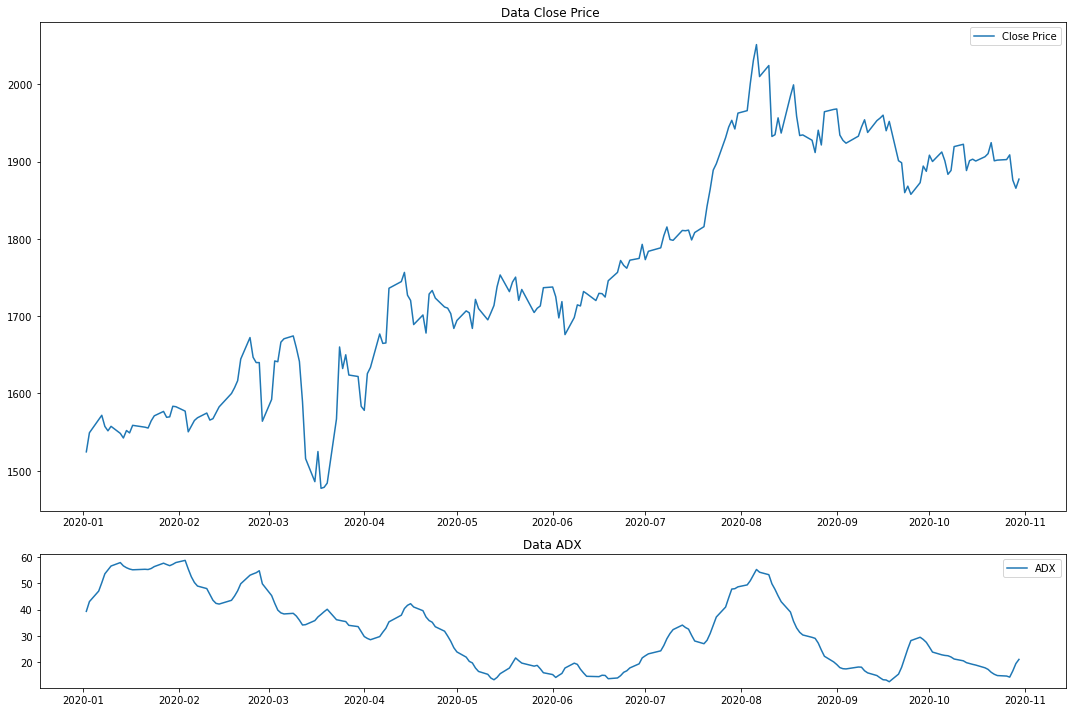

In [40]:
start = '2020-01'
end = '2020-10'

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df[start:end].index,df['Close'][start:end], label='Close Price')
plt.title('Data Close Price ')
plt.legend()

buttom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
buttom.plot(df[start:end].index,df[['ADX']][start:end])
plt.title('Data ADX' )
plt.legend(['ADX'])
plt.tight_layout()

# Average Directional Movement Rating (ADXR)

The ADXR is equal to the current ADX plus the ADX from n bars ago divided by 2. In effect, it is the average of the two ADX values. The ADXR smoothes the ADX, and is therefore less responsive, however, the ADXR filters out excessive tops and bottoms. To interpret the ADXR, consider a high number to be a strong trend, and a low number, a weak trend.


The ADXR was developed by J. Welles Wilder and is described in his 1978 book New Concepts In Technical Trading Systems.

<img src="Pics/ADXR.gif">

real = ADXR(high, low, close, timeperiod=14)

In [41]:
df['ADXR'] = ta.ADXR(df['High'], df['Low'], df['Close'], 10)
df.tail(25)

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX,ADX,ADXR
Date,,,,,,,,,,,
2020-11-12,1869.000000,1878.500000,1866.599976,1872.599976,0.006375,0,18.026312,37.460704,35.025116,24.576734,22.842548
2020-11-13,1877.000000,1890.099976,1876.800049,1885.699951,0.006971,0,20.930281,35.206531,25.431173,24.662178,23.075920
2020-11-16,1874.599976,1887.300049,1871.000000,1887.300049,0.000848,-1,19.703245,35.228602,28.262944,25.022255,22.626713
2020-11-17,1888.400024,1888.400024,1884.500000,1884.500000,-0.001485,-1,19.833704,34.687976,27.244706,25.244500,22.445497
2020-11-18,1873.500000,1873.500000,1873.500000,1873.500000,-0.005854,-1,18.923606,37.684914,33.142200,26.034270,22.891848
2020-11-19,1865.800049,1865.800049,1856.000000,1861.099976,-0.006641,-1,17.503827,42.360218,41.521402,27.582983,24.039046
2020-11-20,1871.199951,1872.599976,1871.199951,1872.599976,0.006160,-1,19.665728,40.160183,34.256820,28.250367,24.801888
2020-11-23,1834.800049,1837.800049,1829.199951,1837.800049,-0.018759,-1,16.148815,50.284720,51.383545,30.563685,26.344782
2020-11-24,1829.300049,1829.300049,1799.300049,1804.800049,-0.018119,0,13.728826,54.387369,59.689979,33.476314,28.446059


In [42]:
Nday = 10
col1_name = []
col2_name = []
col3_name = []
col4_name = []
col5_name = []


for n in range(1,Nday+1):
    cols1 = '+DI'+str(Nday+1-n) 
        
    df[cols1] = df['+DI'].shift(Nday+1-n)
    col1_name.append(cols1)

for n in range(1,Nday+1):
    cols2 = '-DI'+str(Nday+1-n) 
        
    df[cols2] = df['-DI'].shift(Nday+1-n)
    col2_name.append(cols2)
    
for n in range(1,Nday+1):
    cols3 = 'DX'+str(Nday+1-n) 
        
    df[cols3] = df['DX'].shift(Nday+1-n)
    col3_name.append(cols3)  

for n in range(1,Nday+1):
    cols4 = 'ADX'+str(Nday+1-n) 
        
    df[cols4] = df['ADX'].shift(Nday+1-n)
    col4_name.append(cols4)
    
for n in range(1,Nday+1):
    cols5 = 'ADXR'+str(Nday+1-n) 
        
    df[cols5] = df['ADXR'].shift(Nday+1-n)
    col5_name.append(cols5)
    
    
df.tail(25)

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX,ADX,...,ADXR10,ADXR9,ADXR8,ADXR7,ADXR6,ADXR5,ADXR4,ADXR3,ADXR2,ADXR1
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-12,1869.000000,1878.500000,1866.599976,1872.599976,0.006375,0,18.026312,37.460704,35.025116,24.576734,...,19.231431,19.510242,19.396267,18.222603,17.552826,17.356109,17.636174,17.862165,19.424319,21.465652
2020-11-13,1877.000000,1890.099976,1876.800049,1885.699951,0.006971,0,20.930281,35.206531,25.431173,24.662178,...,19.510242,19.396267,18.222603,17.552826,17.356109,17.636174,17.862165,19.424319,21.465652,22.842548
2020-11-16,1874.599976,1887.300049,1871.000000,1887.300049,0.000848,-1,19.703245,35.228602,28.262944,25.022255,...,19.396267,18.222603,17.552826,17.356109,17.636174,17.862165,19.424319,21.465652,22.842548,23.075920
2020-11-17,1888.400024,1888.400024,1884.500000,1884.500000,-0.001485,-1,19.833704,34.687976,27.244706,25.244500,...,18.222603,17.552826,17.356109,17.636174,17.862165,19.424319,21.465652,22.842548,23.075920,22.626713
2020-11-18,1873.500000,1873.500000,1873.500000,1873.500000,-0.005854,-1,18.923606,37.684914,33.142200,26.034270,...,17.552826,17.356109,17.636174,17.862165,19.424319,21.465652,22.842548,23.075920,22.626713,22.445497
2020-11-19,1865.800049,1865.800049,1856.000000,1861.099976,-0.006641,-1,17.503827,42.360218,41.521402,27.582983,...,17.356109,17.636174,17.862165,19.424319,21.465652,22.842548,23.075920,22.626713,22.445497,22.891848
2020-11-20,1871.199951,1872.599976,1871.199951,1872.599976,0.006160,-1,19.665728,40.160183,34.256820,28.250367,...,17.636174,17.862165,19.424319,21.465652,22.842548,23.075920,22.626713,22.445497,22.891848,24.039046
2020-11-23,1834.800049,1837.800049,1829.199951,1837.800049,-0.018759,-1,16.148815,50.284720,51.383545,30.563685,...,17.862165,19.424319,21.465652,22.842548,23.075920,22.626713,22.445497,22.891848,24.039046,24.801888
2020-11-24,1829.300049,1829.300049,1799.300049,1804.800049,-0.018119,0,13.728826,54.387369,59.689979,33.476314,...,19.424319,21.465652,22.842548,23.075920,22.626713,22.445497,22.891848,24.039046,24.801888,26.344782


In [43]:
df['Target'] =  df['Label']
#stock['Trend'] =  np.sign(stock['Close']-stock['Open'])
df.dropna(inplace=True)
#df.drop(columns = ['High','Low','Open','Close','Rets','Label','+DI','-DI','DX','ADX','ADXR'], inplace = True)

df

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX,ADX,...,ADXR9,ADXR8,ADXR7,ADXR6,ADXR5,ADXR4,ADXR3,ADXR2,ADXR1,Target
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-03,1432.300049,1432.300049,1415.900024,1416.000000,-0.014861,0,35.524119,17.104382,34.999547,38.530516,...,28.785037,28.519424,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,0
2011-03-04,1418.900024,1429.800049,1416.800049,1428.199951,0.008579,0,32.232324,15.519427,34.999547,38.177419,...,28.519424,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,0
2011-03-07,1434.500000,1445.000000,1429.500000,1434.099976,0.004123,-1,38.719541,13.790853,47.473816,39.107059,...,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,-1
2011-03-08,1431.599976,1432.599976,1424.300049,1426.900024,-0.005033,-1,36.112546,16.434929,37.447312,38.941084,...,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,32.837431,-1
2011-03-09,1430.000000,1435.699951,1426.099976,1429.300049,0.001681,-1,35.851641,15.312736,40.142979,39.061274,...,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,1835.500000,1835.699951,1822.699951,1828.699951,-0.006052,1,21.196692,33.876191,23.023125,26.278294,...,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,1
2020-12-15,1833.500000,1853.599976,1833.199951,1852.300049,0.012823,0,26.238115,30.507061,7.523011,24.402766,...,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,0
2020-12-16,1856.500000,1864.699951,1850.500000,1856.099976,0.002049,0,29.316717,28.698524,1.065570,22.069046,...,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,31.688336,0


# CUSUM Sampling

In [44]:
def cusum_filter(series, threshold, ingredient='ret'):
    t_events = []
    if ingredient == 'ret':
        returns = series.pct_change()
    elif ingredient == 'log_ret':
        returns = series.apply(np.log).diff()
    returns = returns.iloc[1:]        # remove first nan
    sum_pos = 0
    sum_neg = 0
    for index, ret in returns.items():
        sum_pos += max(sum_pos + ret, 0)
        sum_neg += max(sum_neg - ret, 0)
        
        if sum_pos > threshold:
            t_events.append(index)
            sum_pos = 0

        if sum_neg > threshold:
            t_events.append(index)
            sum_neg = 0
        
    return pd.DatetimeIndex(t_events)

In [45]:
t_events = cusum_filter(df['Close'], 0.01, ingredient='log_ret')
t_events

DatetimeIndex(['2011-03-07', '2011-03-10', '2011-03-14', '2011-03-15',
               '2011-03-17', '2011-03-21', '2011-03-24', '2011-03-25',
               '2011-03-29', '2011-03-31',
               ...
               '2020-11-25', '2020-11-30', '2020-12-01', '2020-12-03',
               '2020-12-07', '2020-12-09', '2020-12-11', '2020-12-15',
               '2020-12-16', '2020-12-17'],
              dtype='datetime64[ns]', length=1324, freq=None)

In [46]:
sample = df.loc[t_events]
sample

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX,ADX,...,ADXR9,ADXR8,ADXR7,ADXR6,ADXR5,ADXR4,ADXR3,ADXR2,ADXR1,Target
2011-03-07,1434.500000,1445.000000,1429.500000,1434.099976,0.004123,-1,38.719541,13.790853,47.473816,39.107059,...,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,-1
2011-03-10,1429.500000,1429.800049,1403.800049,1412.199951,-0.012036,0,29.740658,27.322136,4.238352,35.578981,...,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,0
2011-03-14,1420.000000,1427.699951,1420.000000,1424.599976,0.002178,-1,28.430925,22.935650,10.698153,30.270242,...,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,-1
2011-03-15,1413.300049,1413.300049,1385.500000,1392.599976,-0.022719,1,21.951480,37.817538,26.545623,29.897780,...,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,1
2011-03-17,1387.699951,1393.599976,1387.699951,1404.000000,0.005714,1,19.343043,37.508791,31.952792,29.801587,...,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,34.410313,34.046540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-09,1867.099976,1867.099976,1827.000000,1834.599976,-0.019540,1,26.403302,39.015073,19.278637,28.366714,...,28.446059,30.337207,31.995298,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,1
2020-12-11,1838.500000,1846.000000,1829.099976,1839.800049,0.003376,1,22.749550,33.616073,19.278637,26.639979,...,31.995298,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,1
2020-12-15,1833.500000,1853.599976,1833.199951,1852.300049,0.012823,0,26.238115,30.507061,7.523011,24.402766,...,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,0
2020-12-16,1856.500000,1864.699951,1850.500000,1856.099976,0.002049,0,29.316717,28.698524,1.065570,22.069046,...,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,31.688336,0


In [47]:
sample.set_index(t_events, inplace=True)
sample.dropna(inplace = True)
sample.head(20)

,Open,High,Low,Close,Rets,Label,+DI,-DI,DX,ADX,...,ADXR9,ADXR8,ADXR7,ADXR6,ADXR5,ADXR4,ADXR3,ADXR2,ADXR1,Target
2011-03-07,1434.500000,1445.000000,1429.500000,1434.099976,0.004123,-1,38.719541,13.790853,47.473816,39.107059,...,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,-1
2011-03-10,1429.500000,1429.800049,1403.800049,1412.199951,-0.012036,0,29.740658,27.322136,4.238352,35.578981,...,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,0
2011-03-14,1420.000000,1427.699951,1420.000000,1424.599976,0.002178,-1,28.430925,22.935650,10.698153,30.270242,...,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,-1
2011-03-15,1413.300049,1413.300049,1385.500000,1392.599976,-0.022719,1,21.951480,37.817538,26.545623,29.897780,...,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,1
2011-03-17,1387.699951,1393.599976,1387.699951,1404.000000,0.005714,1,19.343043,37.508791,31.952792,29.801587,...,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,34.410313,34.046540,1
2011-03-21,1433.500000,1433.500000,1430.800049,1426.199951,0.007248,0,38.990718,30.113745,12.845731,25.430954,...,34.229400,35.669169,34.275037,33.249276,33.351181,34.410313,34.046540,33.989503,32.968185,0
2011-03-24,1437.699951,1446.900024,1437.500000,1434.800049,-0.002158,0,43.495948,25.221879,26.592908,24.060150,...,33.249276,33.351181,34.410313,34.046540,33.989503,32.968185,32.186019,31.594136,29.678857,0
2011-03-25,1436.000000,1436.000000,1436.000000,1426.099976,-0.006082,0,43.084973,26.164688,24.433744,24.097509,...,33.351181,34.410313,34.046540,33.989503,32.968185,32.186019,31.594136,29.678857,28.252534,0
2011-03-29,1416.000000,1416.000000,1416.000000,1416.000000,-0.002680,1,37.809799,40.104700,2.945410,20.119003,...,34.046540,33.989503,32.968185,32.186019,31.594136,29.678857,28.252534,27.183875,25.962480,1
2011-03-31,1423.300049,1440.000000,1420.699951,1438.900024,0.010550,1,44.684467,29.201863,20.954626,19.489277,...,32.968185,32.186019,31.594136,29.678857,28.252534,27.183875,25.962480,24.840784,24.564024,1


In [48]:
sample.drop(columns = ['High','Low','Open','Close','Rets','Label','+DI','-DI','DX','ADX','ADXR'], inplace = True)
sample

,+DI10,+DI9,+DI8,+DI7,+DI6,+DI5,+DI4,+DI3,+DI2,+DI1,...,ADXR9,ADXR8,ADXR7,ADXR6,ADXR5,ADXR4,ADXR3,ADXR2,ADXR1,Target
2011-03-07,29.165040,36.613522,36.101174,35.368399,31.767257,33.373308,40.441111,41.396982,35.524119,32.232324,...,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,-1
2011-03-10,35.368399,31.767257,33.373308,40.441111,41.396982,35.524119,32.232324,38.719541,36.112546,35.851641,...,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,0
2011-03-14,33.373308,40.441111,41.396982,35.524119,32.232324,38.719541,36.112546,35.851641,29.740658,26.344082,...,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,-1
2011-03-15,40.441111,41.396982,35.524119,32.232324,38.719541,36.112546,35.851641,29.740658,26.344082,28.430925,...,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,1
2011-03-17,35.524119,32.232324,38.719541,36.112546,35.851641,29.740658,26.344082,28.430925,21.951480,20.417606,...,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,34.410313,34.046540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-09,16.148815,13.728826,13.478179,11.187578,20.090902,23.715572,26.855333,27.011441,29.538629,31.386325,...,28.446059,30.337207,31.995298,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,1
2020-12-11,13.478179,11.187578,20.090902,23.715572,26.855333,27.011441,29.538629,31.386325,26.403302,24.335287,...,31.995298,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,1
2020-12-15,20.090902,23.715572,26.855333,27.011441,29.538629,31.386325,26.403302,24.335287,22.749550,21.196692,...,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,0
2020-12-16,23.715572,26.855333,27.011441,29.538629,31.386325,26.403302,24.335287,22.749550,21.196692,26.238115,...,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,31.688336,0


In [49]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1324 entries, 2011-03-07 to 2020-12-17
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   +DI10   1324 non-null   float64
 1   +DI9    1324 non-null   float64
 2   +DI8    1324 non-null   float64
 3   +DI7    1324 non-null   float64
 4   +DI6    1324 non-null   float64
 5   +DI5    1324 non-null   float64
 6   +DI4    1324 non-null   float64
 7   +DI3    1324 non-null   float64
 8   +DI2    1324 non-null   float64
 9   +DI1    1324 non-null   float64
 10  -DI10   1324 non-null   float64
 11  -DI9    1324 non-null   float64
 12  -DI8    1324 non-null   float64
 13  -DI7    1324 non-null   float64
 14  -DI6    1324 non-null   float64
 15  -DI5    1324 non-null   float64
 16  -DI4    1324 non-null   float64
 17  -DI3    1324 non-null   float64
 18  -DI2    1324 non-null   float64
 19  -DI1    1324 non-null   float64
 20  DX10    1324 non-null   float64
 21  DX9     1324 non-nu

In [50]:
def NB_create_MeanStd_Storage(Feature_Name, All_Class):
    n_feature = len(Feature_Name)
    n_rows = n_feature + 1
    n_class = len(All_Class)
    n_columns = n_class + 1
    mean = np.zeros([n_rows, n_columns], dtype='object')
    std = np.zeros([n_rows, n_columns], dtype='object')
    for c in range(n_class):
        mean[0, c+1] = All_Class[c]
        std[0, c+1] = All_Class[c]
    for r in range(n_feature):
        mean[r+1, 0] = Feature_Name[r]
        std[r+1, 0] = Feature_Name[r]
    return mean, std

In [51]:
def NBCD_fit(X_Train, Y_Train, Feature_Name, All_Class):
    mean, std = NB_create_MeanStd_Storage(Feature_Name, All_Class)
    n_feature = len(Feature_Name)
    n_class = len(All_Class)
    for c, _class in enumerate(All_Class):
        filter_class = np.argwhere(Y_Train[:, 0] == _class).ravel()
        X_Class = X_Train[filter_class]
        for r in range(n_feature):
            mean[r+1, c+1] = X_Class[:, r].mean()
            std[r+1, c+1] = X_Class[:, r].std()
    return mean, std

In [52]:
def NBCD_predict(X_Test, mean, std, All_Class, Count_All_Class, top = 1):
    prob_class = Count_All_Class/(Count_All_Class.sum())
    n_feature = X_Test.shape[1]
    n_class = len(All_Class)
    Yhat = []
    for x_test in X_Test:
        prob_fgc = np.zeros([n_feature, n_class])
        for d in range(n_feature):
            for c in range(n_class):
                prob_fgc[d, c] = normal_pdf(x_test[d], mean[d+1, c+1], std[d+1, c+1])
        prob_afgc = prob_fgc.prod(axis=0)
        prob_nb = prob_class*prob_afgc
        sorted_class = All_Class[prob_nb.argsort()[::-1]]
        Yhat.append(sorted_class)
    return np.array(Yhat)[:, :top]

In [53]:
def normal_pdf(x, mean, std):
    degree = ((x - mean)/std)**2
    fraction = np.e**(-degree/2)
    denorminator = std*np.sqrt(2*np.pi)
    pdf = fraction/denorminator
    return pdf

In [54]:
def find_error_classification(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

In [55]:
Data = sample.copy()
Data

,+DI10,+DI9,+DI8,+DI7,+DI6,+DI5,+DI4,+DI3,+DI2,+DI1,...,ADXR9,ADXR8,ADXR7,ADXR6,ADXR5,ADXR4,ADXR3,ADXR2,ADXR1,Target
2011-03-07,29.165040,36.613522,36.101174,35.368399,31.767257,33.373308,40.441111,41.396982,35.524119,32.232324,...,28.618567,28.884638,29.167266,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,-1
2011-03-10,35.368399,31.767257,33.373308,40.441111,41.396982,35.524119,32.232324,38.719541,36.112546,35.851641,...,28.256154,27.665110,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,0
2011-03-14,33.373308,40.441111,41.396982,35.524119,32.232324,38.719541,36.112546,35.851641,29.740658,26.344082,...,28.669322,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,-1
2011-03-15,40.441111,41.396982,35.524119,32.232324,38.719541,36.112546,35.851641,29.740658,26.344082,28.430925,...,30.149510,30.337406,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,1
2011-03-17,35.524119,32.232324,38.719541,36.112546,35.851641,29.740658,26.344082,28.430925,21.951480,20.417606,...,30.930261,32.837431,34.229400,35.669169,34.275037,33.249276,33.351181,34.410313,34.046540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-09,16.148815,13.728826,13.478179,11.187578,20.090902,23.715572,26.855333,27.011441,29.538629,31.386325,...,28.446059,30.337207,31.995298,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,1
2020-12-11,13.478179,11.187578,20.090902,23.715572,26.855333,27.011441,29.538629,31.386325,26.403302,24.335287,...,31.995298,32.366996,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,1
2020-12-15,20.090902,23.715572,26.855333,27.011441,29.538629,31.386325,26.403302,24.335287,22.749550,21.196692,...,32.109203,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,0
2020-12-16,23.715572,26.855333,27.011441,29.538629,31.386325,26.403302,24.335287,22.749550,21.196692,26.238115,...,31.730406,31.601876,30.445212,29.970093,30.921514,31.777793,32.984198,32.995016,31.688336,0


In [56]:
DataMatrix = Data.values

In [57]:
DataMatrix.shape

(1324, 51)

In [58]:
D = DataMatrix.shape[1] - 1

In [59]:
X = DataMatrix[:, :D]
Y = DataMatrix[:, D:]

In [60]:
start_train = 80
end_train = -170
end_test = -150

In [61]:
X_Train = X[start_train:end_train, :]
Y_Train = Y[start_train:end_train, :]

X_Test = X[end_train:end_test, :]
Y_Test = Y[end_train:end_test, :]

In [62]:
Feature_Name = np.array(Data.columns[:-1])
All_Class, Count_All_Class = np.unique(Y_Train[:, :], return_counts = True)

In [63]:
Feature_Name

array(['+DI10', '+DI9', '+DI8', '+DI7', '+DI6', '+DI5', '+DI4', '+DI3',
       '+DI2', '+DI1', '-DI10', '-DI9', '-DI8', '-DI7', '-DI6', '-DI5',
       '-DI4', '-DI3', '-DI2', '-DI1', 'DX10', 'DX9', 'DX8', 'DX7', 'DX6',
       'DX5', 'DX4', 'DX3', 'DX2', 'DX1', 'ADX10', 'ADX9', 'ADX8', 'ADX7',
       'ADX6', 'ADX5', 'ADX4', 'ADX3', 'ADX2', 'ADX1', 'ADXR10', 'ADXR9',
       'ADXR8', 'ADXR7', 'ADXR6', 'ADXR5', 'ADXR4', 'ADXR3', 'ADXR2',
       'ADXR1'], dtype=object)

In [64]:
mean, std = NBCD_fit(X_Train, Y_Train, Feature_Name, All_Class)

In [65]:
Yhat_Test = NBCD_predict(X_Test, mean, std, All_Class, Count_All_Class)

In [66]:
error_Test = find_error_classification(Y_Test, Yhat_Test)

In [67]:
error_Test

90.0

In [68]:
Y_Test

array([[0],
       [0],
       [1],
       [-1],
       [-1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]], dtype=object)

In [69]:
Yhat_Test

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]], dtype=object)